# Compare different Nash equilibrium solvers
1. time
2. success rate

In [1]:
from equilibrium_solver import *

# solvers = [NashEquilibriaSolver, NashEquilibriumSolver, NashEquilibriumLPSolver, NashEquilibriumCVXPYSolver, NashEquilibriumGUROBISolver, NashEquilibriumECOSSolver, NashEquilibriumMWUSolver]
solvers = [NashEquilibriumECOSSolver, NashEquilibriumMWUSolver, NashEquilibriumParallelMWUSolver]
print(solvers)


[<function NashEquilibriumECOSSolver at 0x7fea879a5d90>, <function NashEquilibriumMWUSolver at 0x7fea879a5ea0>, <function NashEquilibriumParallelMWUSolver at 0x7fea879a5f28>]


In [3]:
import numpy as np
import time
itr = 10
size = 6
matrix_size = (size, size)
t_list=[]
fail_list=[]
# generate random matrices for test
rand_matrices=[np.array(np.random.uniform(-1, 1, matrix_size)) for _ in range(itr)]

for solver in solvers:
    if solver.__name__ != 'NashEquilibriumParallelMWUSolver':
        t0 = time.time()
        fail = 0.
        for i in range(itr):
            # print(i)
            try:
                solver(rand_matrices[i])
            except:  # TODO this is not accurate since sometimes it returns wrong results but no error
                # print(rand_matrices[i])
                fail+=1
        t1=time.time()
        t_list.append((t1-t0)/itr)
        fail_list.append(fail/itr)
    else:
        t0 = time.time()
        solver(rand_matrices)  # solve multiple matrices at once
        t1=time.time()
        t_list.append((t1-t0)/itr)
        fail_list.append(0.)

for solver, time, fail in zip(solvers, t_list, fail_list):
    print(f"{solver.__name__}, time per matrix: {time}, failure rate: {fail}.")

NashEquilibriumECOSSolver, time per matrix: 0.0006407976150512695, failure rate: 0.0.
NashEquilibriumMWUSolver, time per matrix: 0.002820324897766113, failure rate: 0.0.
NashEquilibriumParallelMWUSolver, time per matrix: 0.00045282840728759765, failure rate: 0.0.


In [14]:
# Gurobi solver does not work in all cases
import numpy as np
matrix_size = (6, 6)
# a=np.array([[ 0.036,  0.023,  0.042,  0.001, -0.002, -0.029],
#  [ 0.031, -0.026,  0.062, -0.034,  0.017, -0.043],
#  [ 0.004, -0.011, -0.026, -0.066, -0.008, -0.031],
#  [-0.03,  -0.032,  0.032, -0.026,  0.01,   0.001],
#  [-0.009,  0.042,  0.047, -0.023, -0.03,  -0.001],
#  [ 0.024,  0.034,  0.017,  0.017, -0.043, -0.061]])
# print(np.linalg.det(a))
a=np.array([[95, 97], [97, 97]])
NashEquilibriumGUROBISolver(a)

for i in range(20):
    print(i)
    a=np.array(np.random.uniform(-1, 1, matrix_size))
    print(np.linalg.det(a))
    NashEquilibriumGUROBISolver(a)

([0.0, 1.0], [1.0, 0.0])

In [10]:
def choose(n, k):
    """
    A fast way to calculate binomial coefficients by Andrew Dalke (contrib).
    """
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

# Print total number of possible combinations
print (choose(4, 3)) 

4


7
28
84
210
462
924
1716
3003
5005
8008
12376
18564
27132
38760
54264
74613
100947
134596
177100


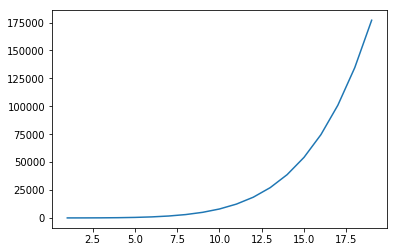

In [20]:
# number of combinations with fixed sum and fixed numbers
# ref: https://math.stackexchange.com/questions/585712/fixed-sum-of-combinations
from matplotlib import pyplot as plt

sum_list = []
comb_list = []

for j in range(1,10):
    sum=j
    parts=7
    max_v=sum+1

    comb = 0
    for i in range(parts):
        comb += (-1)**i * choose(parts, i) * choose(parts+sum-max_v*i-1, parts-1)

    print(comb)
    sum_list.append(j)
    comb_list.append(comb)

plt.plot(sum_list, comb_list)



In [17]:
5**7

78125